In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline



**1. Read Training Data**

Using pandas to read the file

In [8]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**Apply Scatter plot to visualize after reading data to check each row **

Text(0, 0.5, 'Income($)')

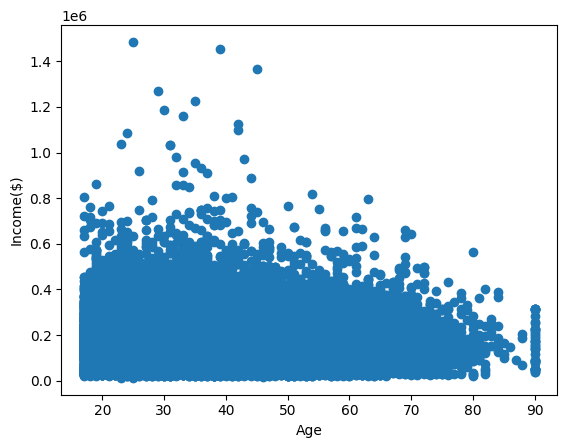

In [9]:
plt.scatter(df.age,df['fnlwgt'])
plt.xlabel('Age')
plt.ylabel('Income($)')


#Encode Categorical Values
Not all data can be presented as numbers in our data set. Furthermore, KMeans does not work with textual data therefore the data has to be encoded to numerical values. To elaborate, area and gender features are represented as text fields. We can use label encoders to convert text to numbers:

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','fnlwgt']])
y_predicted

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [11]:
df['cluster']=y_predicted
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


In [12]:
km.cluster_centers_

array([[3.83301124e+01, 2.06077926e+05],
       [3.96739655e+01, 9.40633196e+04],
       [3.66441900e+01, 3.78825484e+05]])

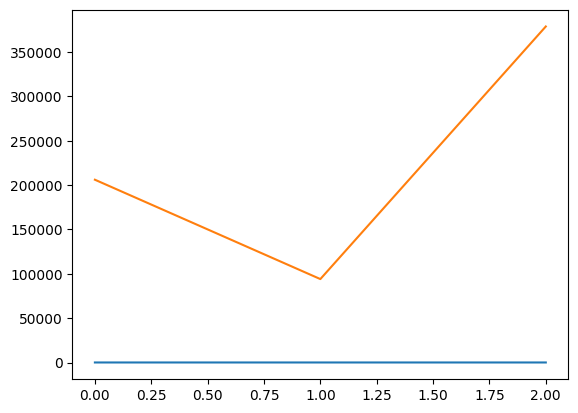

In [13]:
plt.plot(km.cluster_centers_)

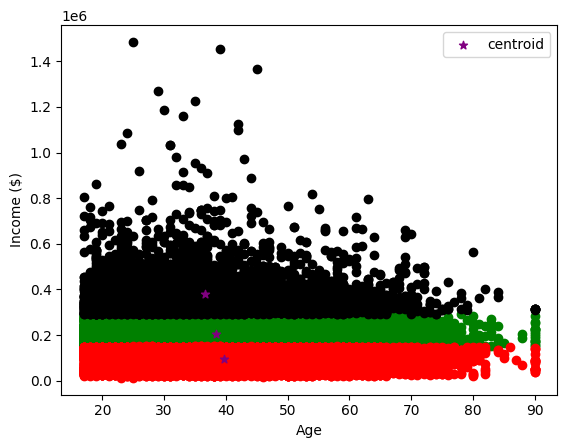

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['fnlwgt'],color='green')
plt.scatter(df2.age,df2['fnlwgt'],color='red')
plt.scatter(df3.age,df3['fnlwgt'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

**Preprocessing using min max scaler**

In [15]:
scaler = MinMaxScaler()

scaler.fit(df[['fnlwgt']])
df['fnlwgt'] = scaler.transform(df[['fnlwgt']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

In [16]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
0,1.000000,?,0.043987,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,1
1,0.890411,Private,0.081896,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1
2,0.671233,?,0.118021,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,0.506849,Private,0.086982,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,1
4,0.328767,Private,0.171404,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


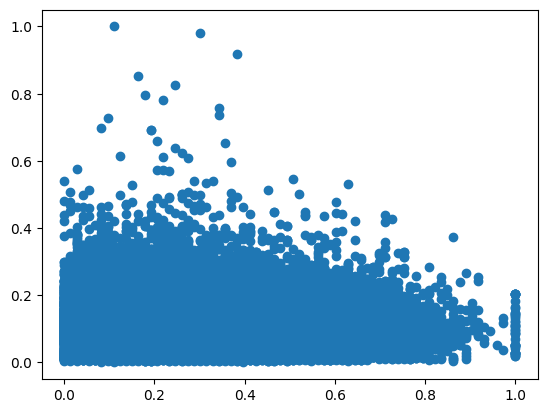

In [18]:
plt.scatter(df.age,df['fnlwgt'])

In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','fnlwgt']])
y_predicted

array([1, 1, 1, ..., 0, 1, 2], dtype=int32)

In [19]:
df['cluster']=y_predicted
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
0,1.000000,?,0.043987,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,1
1,0.890411,Private,0.081896,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1
2,0.671233,?,0.118021,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,1
3,0.506849,Private,0.086982,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,1
4,0.328767,Private,0.171404,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


In [20]:
km.cluster_centers_


array([[0.32191467, 0.11892886],
       [0.57016035, 0.11173528],
       [0.11166874, 0.12726607]])

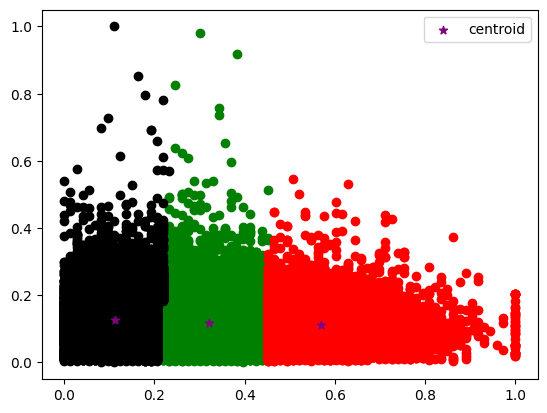

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['fnlwgt'],color='green')
plt.scatter(df2.age,df2['fnlwgt'],color='red')
plt.scatter(df3.age,df3['fnlwgt'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

#Elbow Plot
The technique to determine K, the number of clusters, is called the elbow method.``

In [22]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','fnlwgt']])
    sse.append(km.inertia_)

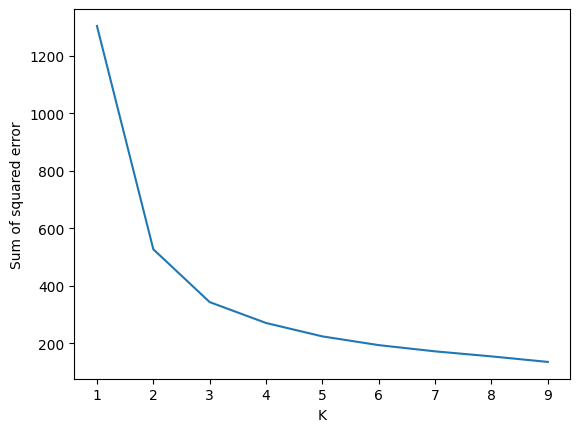

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)